importing libraries

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

step:1 read the data  

In [83]:
bikes= pd.read_csv('hour.csv')

step 2:Analysis the data and feature selection

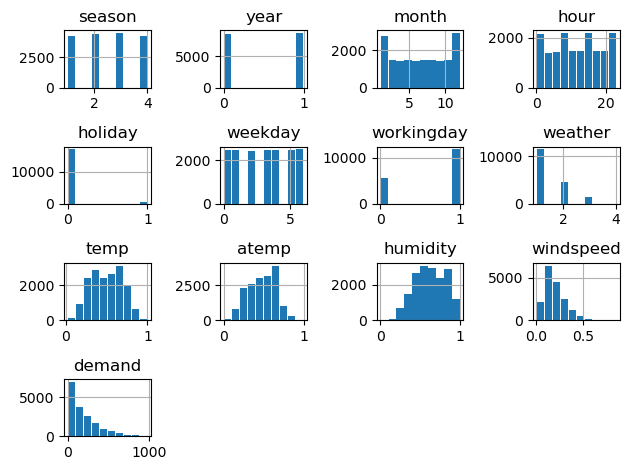

In [84]:
bikes_new =bikes.copy()
bikes_new = bikes_new.drop(['index', 'date','casual','registered'], axis=1)
bikes_new.isnull().sum()
#create pandas histogram to 
bikes_new.hist(rwidth = 0.9)
plt.tight_layout()


step 3:data visualisation

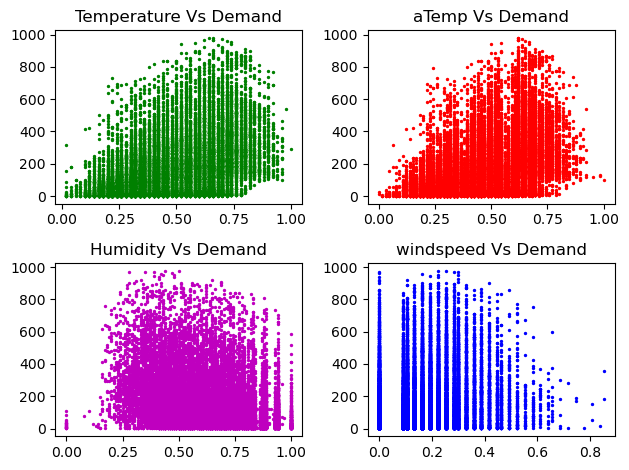

In [85]:
#visualize the continous features vs demand
plt.subplot(2,2,1)
plt.title('Temperature Vs Demand')
plt.scatter(bikes_new['temp'], bikes_new['demand'], s=2, c='g')

plt.subplot(2,2,2)
plt.title('aTemp Vs Demand')
plt.scatter(bikes_new['atemp'], bikes_new['demand'], s=2, c='r')

plt.subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.scatter(bikes_new['humidity'], bikes_new['demand'], s=2, c='m')

plt.subplot(2,2,4)
plt.title('windspeed Vs Demand')
plt.scatter(bikes_new['windspeed'], bikes_new['demand'], s=2, c='b')

plt.tight_layout()


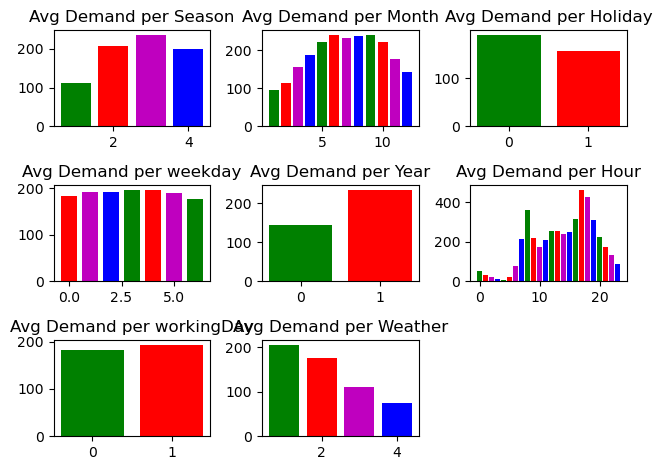

In [86]:
#Visualize the categorical features
colors =[ 'g', 'r', 'm','b']

plt.subplot(3,3,1)
plt.title('Avg Demand per Season')
cat_list=bikes_new['season'].unique()
cat_avg= bikes_new.groupby('season').mean()['demand']
plt.bar(cat_list, cat_avg, color=colors)

plt.subplot(3,3,2)
plt.title('Avg Demand per Month')
cat_list=bikes_new['month'].unique()
cat_avg= bikes_new.groupby('month').mean()['demand']
plt.bar(cat_list, cat_avg, color=colors)

plt.subplot(3,3,3)
plt.title('Avg Demand per Holiday')
cat_list=bikes_new['holiday'].unique()
cat_avg= bikes_new.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_avg, color=colors)

plt.subplot(3,3,4)
plt.title('Avg Demand per weekday')
cat_list=bikes_new['weekday'].unique()
cat_avg= bikes_new.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_avg, color=colors)

plt.subplot(3,3,5)
plt.title('Avg Demand per Year')
cat_list=bikes_new['year'].unique()
cat_avg= bikes_new.groupby('year').mean()['demand']
plt.bar(cat_list, cat_avg, color=colors)

plt.subplot(3,3,6)
plt.title('Avg Demand per Hour')
cat_list=bikes_new['hour'].unique()
cat_avg= bikes_new.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_avg, color=colors)

plt.subplot(3,3,7)
plt.title('Avg Demand per workingDay')
cat_list=bikes_new['workingday'].unique()
cat_avg= bikes_new.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_avg, color=colors)

plt.subplot(3,3,8)
plt.title('Avg Demand per Weather')
cat_list=bikes_new['weather'].unique()
cat_avg= bikes_new.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_avg, color=colors)

plt.tight_layout()

check for outliners

In [87]:
bikes_new['demand'].describe()
bikes_new['demand'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

step 4 :check multiple regression assumptions

#linearity using correlation coefficient matrix using corr
correlation= bikes_new[['temp','atemp','humidity', 'windspeed','demand' ]].corr()
print(correlation)

In [88]:
#drop irrelevant features

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474735, 0.4704958 , 0.49622837, 0.49404082, 0.46795958,
        0.47732067, 0.52675796, 0.5914577 , 0.6520161 , 0.71519583,
        0.8059106 , 0.92531025, 1.        , 0.92531025, 0.8059106 ,
        0.71519583, 0.6520161 , 0.5914577 , 0.52675796, 0.47732067,
        0.46795958, 0.49404082, 0.49622837, 0.4704958 , 0.45474735],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x7f9c111cc640>)

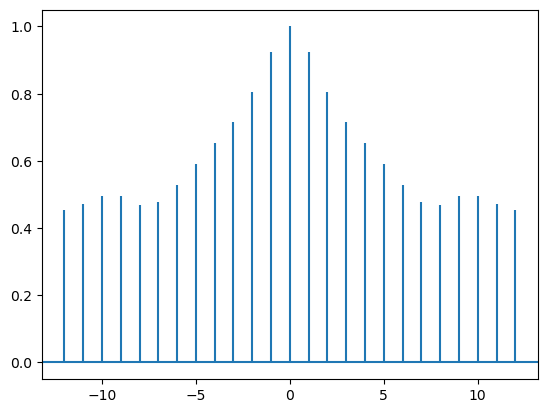

In [89]:
#drop irrelevant features(error)
bikes_new = bikes_new.drop(['weekday','year','atemp','workingday','windspeed'], axis =1)

#autocorrelation of demand using acorr
dff1= pd.to_numeric(bikes_new['demand'], downcast='float')
plt.acorr(dff1, maxlags=12)


step 6 :create and modify new features

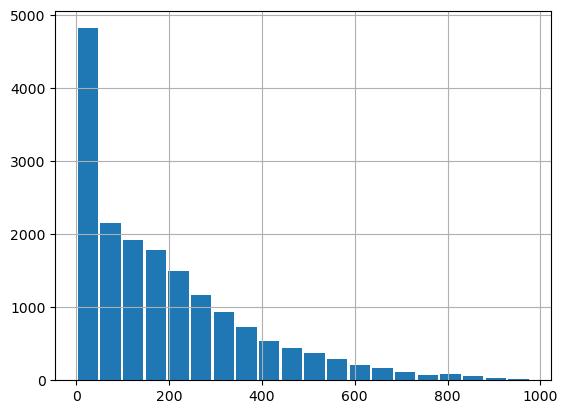

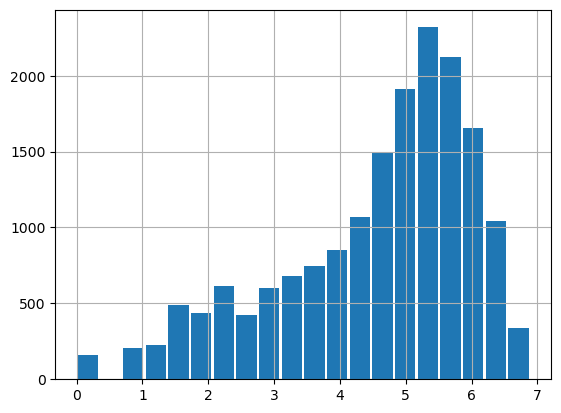

In [90]:
#log normalize the feature demand
df1= bikes_new['demand']
df2= np.log(df1)

plt.figure()
df1.hist(rwidth=0.9, bins=20)

plt.figure()
df2.hist(rwidth=0.9, bins=20)
bikes_new['demand'] = np.log(bikes_new['demand'])


In [91]:
#solving autocorrelation problem by shifting demand by 3 lags
t_1 = bikes_new['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikes_new['demand'].shift(+2).to_frame()
t_2.columns =['t-2']

t_3 = bikes_new['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

bikes_new_lag= pd.concat([bikes_new, t_1, t_2, t_3], axis=1)
bikes_new_lag = bikes_new_lag.dropna()
print(bikes_new_lag)


       season  month  hour  holiday  weather  temp  humidity    demand  \
3           1      1     3        0        1  0.24      0.75  2.564949   
4           1      1     4        0        1  0.24      0.75  0.000000   
5           1      1     5        0        2  0.24      0.75  0.000000   
6           1      1     6        0        1  0.22      0.80  0.693147   
7           1      1     7        0        1  0.20      0.86  1.098612   
...       ...    ...   ...      ...      ...   ...       ...       ...   
17374       1     12    19        0        2  0.26      0.60  4.779123   
17375       1     12    20        0        2  0.26      0.60  4.488636   
17376       1     12    21        0        1  0.26      0.60  4.499810   
17377       1     12    22        0        1  0.26      0.56  4.110874   
17378       1     12    23        0        1  0.26      0.65  3.891820   

            t-1       t-2       t-3  
3      3.465736  3.688879  2.772589  
4      2.564949  3.465736  3.688879

step 7 :create dummy variable and drop first to avoid dummy variables trap

In [92]:
bikes_new_lag.dtypes
bikes_new_lag['season']= bikes_new_lag['season'].astype('category')
bikes_new_lag['holiday']= bikes_new_lag['holiday'].astype('category')
bikes_new_lag['weather']= bikes_new_lag['weather'].astype('category')
bikes_new_lag['month']= bikes_new_lag['month'].astype('category')
bikes_new_lag['hour']= bikes_new_lag['hour'].astype('category')

bikes_new_lag = pd.get_dummies(bikes_new_lag, drop_first= True)


step 8: create train and test split


In [96]:
#Split the X and Y dataset into training and testing set
#
#      from sklearn.model_selection import train_test_split
#      X_train, X_test, Y_train, Y_test = \
#      train_test_split(X, Y, test_size = 0.4, random_state = 1234)
#
# Demand is time-series type of data

Y= bikes_new_lag['demand']
X= bikes_new_lag.drop(['demand'], axis =1)

tr_size = 0.7 * len(X)
tr_size = int(tr_size)

X_train = X.values[0: tr_size]
X_test  = X.values[tr_size : len(X)]

Y_train = Y.values[0: tr_size]
Y_test  = Y.values[tr_size : len(Y)]


step 9 : fit and score  the model

In [98]:
#Linear Regression 
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

r2_train= std_reg.score(X_train, Y_train)
r2_test = std_reg.score(X_test, Y_test)


step 10: create Y Prediction

In [100]:
Y_predict = std_reg.predict(X_test)
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))

#calculate RMSLE and compare result
Y_test_e = []
Y_predict_e =[]

for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))

    
#exponent opposite to log

log_sq_sum = 0.0
for i in range(0, len(Y_test_e )):
    log_a= math.log(Y_test_e[i]+1)
    log_p = math.log(Y_predict_e[i]+1)
    log_diff = (log_p - log_a)**2
    log_sq_sum  = log_sq_sum +log_diff
    
    
rmsle = math.sqrt(log_sq_sum/len(Y_test))
print(rmsle)

0.3560941706980207
